### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

### EDA

##### Сразу импортируем библиотеки, которые нам понадобятся

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import re

warnings.filterwarnings("ignore")

### Первичный анализ

In [41]:
df = pd.read_csv('./clients.csv')

#    выставим максимальное отображение колонок
pd.set_option('display.max_columns', df.shape[1])
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [42]:
#    посмотрим на info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

Есть пропущенные значения, причем в некоторых колонках одинаковое количество.

Посмотрим, что это за строки:

In [43]:
df[~df['Y'].notnull()].sample(5)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
178,1005,1,2004,3,Office,5,410.71,"$ 117,564.07",Sold,C0001,Firm,Kamd,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Agency
192,1034,1,2005,7,Apartment,34,625.80,"$ 204,434.68",Sold,C0174,Firm,Marleez,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
181,1011,1,2005,9,Office,11,827.87,"$ 222,947.21",Sold,C0025,Firm,Abdiel,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,5,Yes,Website
189,1020,1,2005,7,Apartment,20,1160.36,"$ 398,903.42",Sold,C0174,Firm,Marleez,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website
182,1007,1,2005,12,Apartment,7,775.69,"$ 250,312.53",Sold,C0029,Firm,Kenyon,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,1,Yes,Website


Получается, в датасете помимо физических лиц есть некие организации, которые покупали квартиры. Поэтому такие признаки как гендер и возраст для них не заполнялись.

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.50,5051.0
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.00,5.0
Year of sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.00,2010.0
Month of sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.00,12.0
Property number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.00,59.0
Area (ft.),195.0,899.867128,261.489550,410.71,739.86,785.48,1075.46,1942.5
Age at time of purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.00,76.0
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.75,1986.0
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.75,15.0
D,178.0,15.449438,8.457285,1.00,8.00,15.00,23.75,31.0


In [45]:
#    проверим значения колонок на уникальность
for item in df.columns:
    if df[item].nunique() == 1:
        print(f'Признак {item} имеет одно уникальное значение - {df[item][0]}')

Признак Status имеет одно уникальное значение -  Sold 


In [46]:
#    describe показал, что есть значение месяца равное 15
#    проверим остальные строки на ошибочные значения
df[df['M'] > 12]

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
140,5050,5,2007,11,Apartment,50,1093.0,"$ 390,494.27",Sold,C0140,Individual,Aniya,Miller,57.0,56-65,1950.0,15.0,2.0,F,USA,Nevada,Home,3,No,Website


### Модификация датасета

Какие проблемы с данными вы видим:
- Названия в колонках имеют пробелы, можно заменить на '_'
+ Исправить ошибочное значение месяца в строке с индексом 140
- Лишние колонки:
    + Property number - номера домов, можно удалить
    + Status - одно значение во всех строках (Sold)
    + Age at time of purchase - лишняя, мы можем вычислить это значение разницей года рождения и года покупки
+ Значения в Price строковые, необходимо перевести в float

In [47]:
#    чистим значения в Price от лишних символов и переводим в float
df['Price'] = df['Price'].str.replace(r'[$ ,]', '', regex=True).astype('float')
df['Price'].dtype

dtype('float64')

In [48]:
#    вероятнее всего, перепутаны местами значения месяца и дня в дате рождения 140-го индекса
#    просто поменяем их местами

df['D'][140] = 15.
df['M'][140] = 2.
df[['D', 'M']][140:141]

,D,M
140,15.0,2.0


In [49]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [50]:
#   изменим футы квадратные на метры квадратные
df['Area (ft.)'] = df['Area (ft.)'] / 10.7639

In [51]:
#    удаляем лишние колонки
df.drop(['Property number', 'Status', 
         'Age at time of purchase'], axis=1, inplace=True)

df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Area (ft.)', 'Price', 'Customer ID', 'Entity', 'Name', 'Surname',
       'Age Interval ', 'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [52]:
#    меняем название колонок - избавляемся от пробелов, скобок, точек и т.д.
#    также переведем названия в нижний регистр и добавим смысла в некоторые названия
df = df.rename(columns=lambda x: re.sub(' ', '_', x)).\
        rename(columns=lambda x: re.sub('of_', '', x)).\
        rename(columns=lambda x: re.sub('[().]', '', x)).\
        rename(str.lower, axis=1).\
        rename(columns={'price': 'price_usd'}).\
        rename(columns={'building': 'num_buildings'}).\
        rename(columns={'age_interval_': 'age_interval'}).\
        rename(columns={'area_ft': 'area_m'})
df.columns

Index(['id', 'num_buildings', 'year_sale', 'month_sale', 'type_property',
       'area_m', 'price_usd', 'customer_id', 'entity', 'name', 'surname',
       'age_interval', 'y', 'm', 'd', 'gender', 'country', 'state', 'purpose',
       'deal_satisfaction', 'mortgage', 'source'],
      dtype='object')

In [53]:
#    взглянем, что получилось после наших манипуляций
df.sample(10)

,id,num_buildings,year_sale,month_sale,type_property,area_m,price_usd,customer_id,entity,name,surname,age_interval,y,m,d,gender,country,state,purpose,deal_satisfaction,mortgage,source
13,2036,2,2006,11,Apartment,103.052797,460001.26,C0061,Individual,Enrique,Cardenas,26-35,1977.0,6.0,10.0,M,USA,California,Home,2,No,Website
136,5046,5,2007,11,Apartment,74.162711,230216.22,C0147,Individual,Parker,Poole,56-65,1951.0,11.0,10.0,M,USA,California,Home,5,No,Website
81,3055,3,2007,5,Apartment,113.559212,380809.52,C0099,Individual,Frank,Meyer,36-45,1964.0,3.0,16.0,M,USA,California,Home,3,Yes,Agency
141,2039,2,2006,8,Apartment,86.198311,293876.27,C0043,Individual,Kayley,Nielsen,56-65,1947.0,4.0,27.0,F,USA,Arizona,Home,4,Yes,Website
90,4022,4,2007,8,Apartment,73.813395,263790.81,C0058,Individual,Johanna,Fisher,36-45,1962.0,8.0,25.0,F,USA,California,Home,4,Yes,Website
67,2047,2,2007,2,Apartment,60.368454,214631.68,C0068,Individual,Nicolas,Navarro,36-45,1966.0,6.0,17.0,M,USA,Oregon,Investment,3,No,Agency
113,3030,3,2006,10,Apartment,66.965505,215774.28,C0052,Individual,Tristian,Fuller,46-55,1956.0,3.0,13.0,M,USA,California,Home,5,No,Agency
91,3059,3,2007,6,Apartment,108.840662,367976.46,C0107,Individual,Curtis,Howard,36-45,1962.0,9.0,11.0,M,USA,California,Home,2,No,Agency
12,4035,4,2007,10,Apartment,73.813395,217786.38,C0057,Individual,Michelle,Cameron,26-35,1978.0,6.0,4.0,F,USA,Nevada,Home,3,Yes,Website
112,3007,3,2006,10,Apartment,66.955286,231552.33,C0052,Individual,Tristian,Fuller,46-55,1956.0,3.0,13.0,M,USA,California,Investment,5,No,Agency


### Анализ признаков

Теперь посмотрим на некоторые признаки и рассмотрим их поближе. Отразим графически и попробуем сделать какие-то выводы.

Я решил разделить наш датасет на две группы - физические лица и компании.

У физлиц мы проанализируем:
- гендер
- интервал
- цели
- цену покупки
- площадь

У компаний:
- цену покупки
- цели
- площадь

Распределение гендера, стоимости,распределение площади, комнат, сезон покупки, , временной интервал

In [54]:
#   разделим наш датасет df на физлица и компании
condition = df['gender'].isnull()

#    df_people - физлица
df_people = df[~condition]

#   df_co - компании
df_co = df[condition]
df_co.reset_index(inplace=True)


### Физлица:

#### Гендер:

gender
M    0.606742
F    0.393258
Name: proportion, dtype: float64

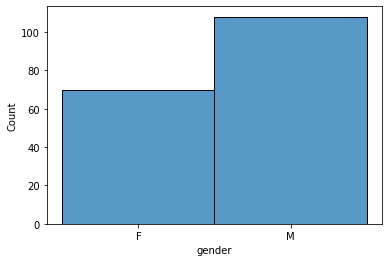

In [55]:
sns.histplot(df_people['gender'])
df_people['gender'].value_counts(normalize=True)

Примерно в 60% случаев покупку дома осуществляют мужчины.

#### Временные интервалы:

age_interval
36-45    0.292135
46-55    0.230337
26-35    0.202247
56-65    0.146067
65+      0.101124
18-25    0.028090
Name: proportion, dtype: float64

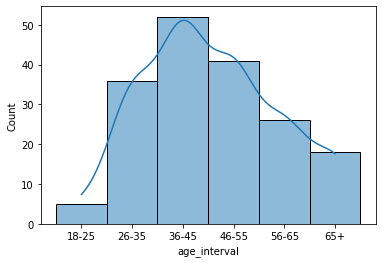

In [56]:
sns.histplot(df_people['age_interval'], kde=True)
df_people['age_interval'].value_counts(normalize=True)

Наиболее частый возрастной интервал - 36-45 лет

#### Цели:

purpose
Home          0.662921
Investment    0.337079
Name: proportion, dtype: float64

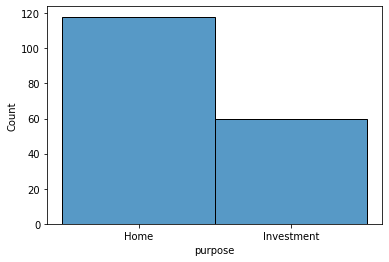

In [57]:
sns.histplot(df_people['purpose'])
df_people['purpose'].value_counts(normalize=True)

В 2 из 3 случаев люди покупают недвижимость с целью проживания. В остальной трети - инвестиция.

#### Стоимость недвижимости:

count       178.000000
mean     270965.425730
std       78525.152444
min      153466.710000
25%      214826.330000
50%      245196.730000
75%      309387.082500
max      503790.230000
Name: price_usd, dtype: float64

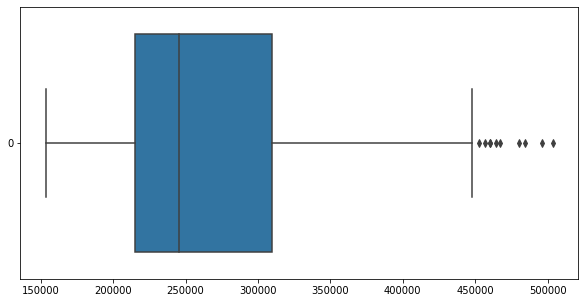

In [58]:
#    отрисуем боксплот
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = df_people['price_usd'], orient='h')
df_people['price_usd'].describe().T

<Axes: xlabel='price_usd', ylabel='Count'>

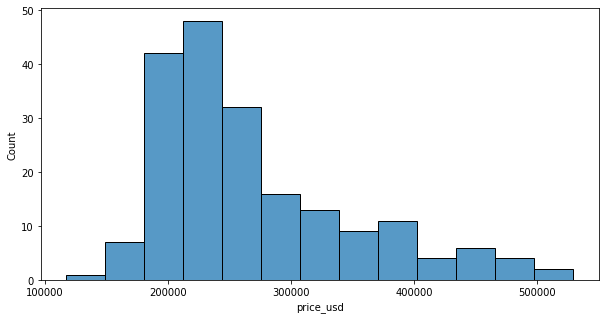

In [59]:
#    отрисуем гистограмму
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['price_usd'])

Боксплот показывает, что есть некие выбросы.

Но не думаю, что их можно считать таковыми - это не похоже на аномалии или ошибки данных.
Посчитаем через z-score:

In [60]:
from scipy.stats import zscore

df_people['z_price_usd'] = zscore(df_people['price_usd'])
df_people[abs(df_people['z_price_usd']) > 3]['price_usd'].value_counts().sum()

0

Мы не знаем, какое отклонение имеет генеральная совокупность, поэтому будем считать доверительный интервал через t-students 

In [61]:
#    позаимствуем функцию из лекции
def students_t_distribution_confidence_interval(data_points, t_stat_95_cli):
    # Obtain statistics for sample
    sample_mean = np.mean(data_points)
    sample_std = np.std(data_points)
    sample_std_err = sample_std / np.sqrt(len(data_points))

    # T-stat table degrees = 27 len(datapoints) and alpha 0.05/2 = 0.025 -> the value 2.052
    #t_stat_95_cli = 2.052
    #print(f"С вероятностью в 95% средняя цена покупки лежит в диапазоне: [${round(sample_mean - t_stat_95_cli * sample_std_err, 2)}, ${round(sample_mean + t_stat_95_cli * sample_std_err, 2)}]")
    return [sample_mean, t_stat_95_cli * sample_std_err]


In [62]:
len(df_people['price_usd'])

178

In [63]:
#   178 значений: t_stat_95_cli = 1.9734
#   https://www.tutorialspoint.com/statistics/t_distribution_table.htm
students_t_distribution_confidence_interval(df_people['price_usd'], 1.9734)

[270965.4257303371, 11582.186209978849]

Получается, с 95% вероятностью можем утверждать, что наше среднее лежит в диапазоне $ 270,965.42 ± 11,582.18

#### Площадь недвижимости:

<Axes: xlabel='area_m', ylabel='Count'>

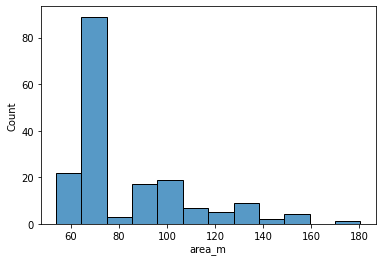

In [64]:
sns.histplot(df_people['area_m'])

<Axes: xlabel='cost_m', ylabel='Count'>

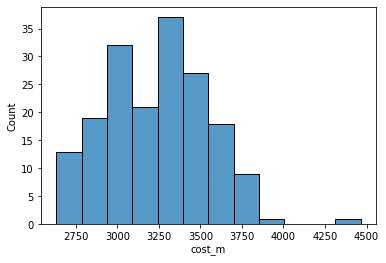

In [65]:
#   посмотрим на стоимость квадратного метра
df_people['cost_m'] = df_people['price_usd']/df_people['area_m']
sns.histplot(df_people['cost_m'])

In [66]:
#   посчитаем z-score
df_people['z_cost_m'] = zscore(df_people['cost_m'])
df_people[abs(df_people['z_cost_m']) > 3]['cost_m']

13    4463.743577
Name: cost_m, dtype: float64

In [67]:
cost_array = df_people['cost_m'].copy()
cost_array.drop(index=13, inplace=True)

In [68]:
len(cost_array)

177

In [69]:
#    177 -> 1.9735
students_t_distribution_confidence_interval(cost_array, 1.9735)

[3223.426276874012, 43.62030211427676]

С 95% вероятностью можем утверждать, что наше средняя цена квадратного метра лежит в диапазоне $ 3,223.42 ± 43.62

#### Количество комнат:

num_buildings
3    0.297753
2    0.292135
1    0.174157
4    0.129213
5    0.106742
Name: proportion, dtype: float64

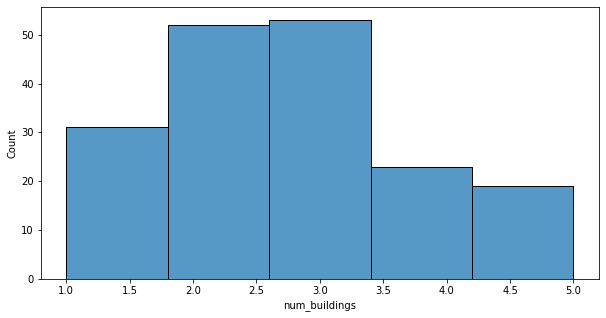

In [70]:
#    количество комнат
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df_people['num_buildings'], bins=5)
df_people['num_buildings'].value_counts(normalize=True)

Практически 60% купленных квартир - 2- и 3-х комнатные.

#### Ипотека:

mortgage
No     0.679775
Yes    0.320225
Name: proportion, dtype: float64

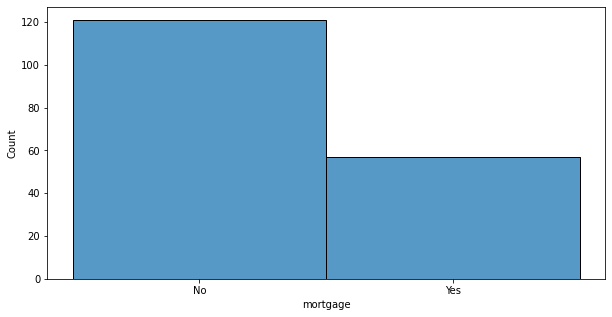

In [71]:
#   ипотека
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df_people['mortgage'])
df_people['mortgage'].value_counts(normalize=True)

~68% - недвижимость в ипотеку.

#### Месяц продажи:

month_sale
11    0.140449
3     0.123596
10    0.101124
12    0.101124
8     0.101124
6     0.084270
9     0.078652
4     0.073034
5     0.061798
7     0.044944
1     0.044944
2     0.044944
Name: proportion, dtype: float64

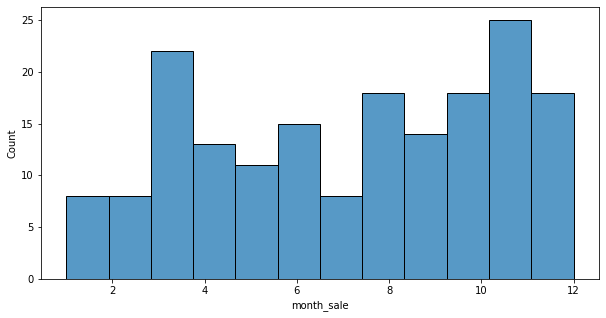

In [72]:
#    месяц продажи
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df_people['month_sale'], bins=12)
df_people['month_sale'].value_counts(normalize=True)

Чаще сделки совершается в ноябре и марте, реже всего - январе, феврале и июле.

#### Матрица корреляции:

In [73]:
df_people.columns

Index(['id', 'num_buildings', 'year_sale', 'month_sale', 'type_property',
       'area_m', 'price_usd', 'customer_id', 'entity', 'name', 'surname',
       'age_interval', 'y', 'm', 'd', 'gender', 'country', 'state', 'purpose',
       'deal_satisfaction', 'mortgage', 'source', 'z_price_usd', 'cost_m',
       'z_cost_m'],
      dtype='object')

<Axes: >

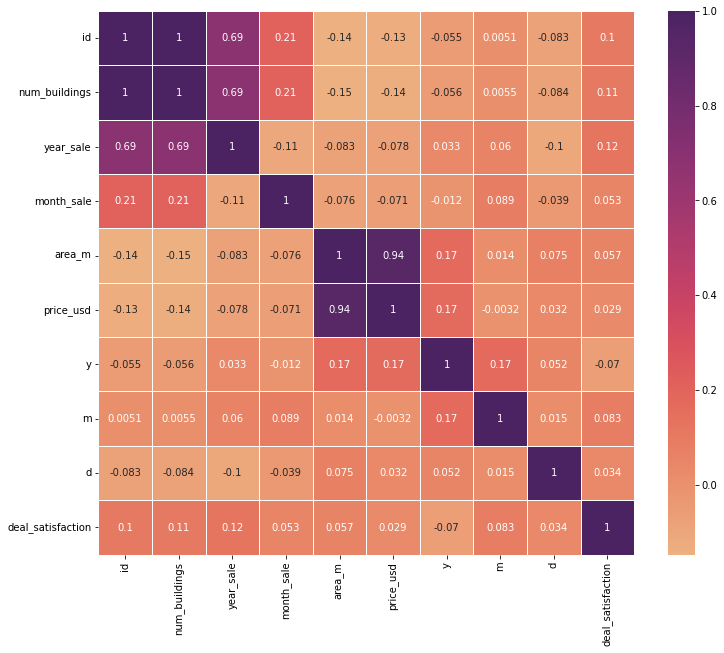

In [74]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_people[['id', 'num_buildings', 'year_sale', 'month_sale', 'area_m', 'price_usd',
                       'y', 'm', 'd', 'deal_satisfaction']].\
                        corr(), annot=True, linewidth=.5, cmap='flare')

#sns.heatmap(df[['num_buildings', 'area_ft', 'price_usd',\
#               'deal_satisfaction', 'date_birth', 'date_sale']].\
#            corr(), annot=True, linewidth=.5, cmap='viridis')

Ожидаемо высокая корреляция площади недвижимости и цены: больше площадь - больше цена.

Странная корреляция количества комнат и года продажи: будто бы чем больше год, тем больше комнат. Посмотрим визуально:

<Axes: xlabel='year_sale', ylabel='num_buildings'>

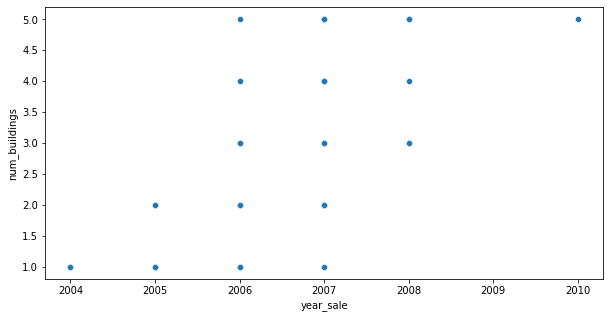

In [75]:
#    scatterplot года продажи и количество комнат - ничего интересного
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(y=df_people['num_buildings'], x=df_people['year_sale'])

Выводы по физлицам:
Покупатель недвижимости в 60% случаев - мужчина, чаще всего в возрасте от 36 до 45 лет, в 2/3 случаев недвижимость приобретает для собственного проживания, в среднем готов потратить 270,965.42 ± 11,582.18 USD, ожидая цену за кв.метр 3,223.42 ± 43.62 USD, в 60% случаев будет покупать 2- или 3-комнатную недвижимость, в 68% случаев в ипотеку, чаще всего захочет купить недвижимость в ноябре и марте, и реже всего - январе, феврале и июле.

### Компании

purpose
Investment    0.941176
Home          0.058824
Name: proportion, dtype: float64

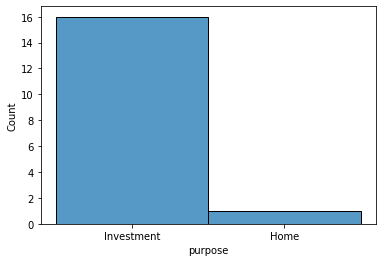

In [76]:
sns.histplot(df_co['purpose'])
df_co['purpose'].value_counts(normalize=True)

В 94% случаев компании приобретают недвижимость с целью инвестиций.

<Axes: xlabel='price_usd', ylabel='Count'>

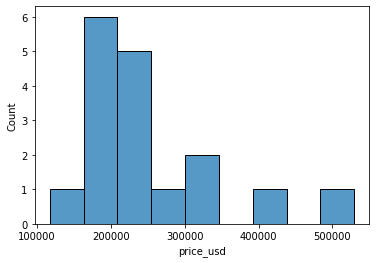

In [77]:
sns.histplot(df_co['price_usd'])

<Axes: >

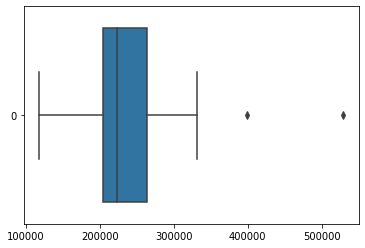

In [78]:
sns.boxplot(df_co['price_usd'], orient='h')

In [79]:
#   посчитаем z-score
df_co['z_price_usd'] = zscore(df_co['price_usd'])
df_co[abs(df_co['z_price_usd']) > 3]['price_usd']

Series([], Name: price_usd, dtype: float64)

In [80]:
len(df_co['price_usd'])

17

In [81]:
#    17 -> 2.1098
students_t_distribution_confidence_interval(df_co['price_usd'], 2.1098)

[253405.50588235297, 47971.06241172204]

С 95% вероятностью можем утверждать, что наше среднее лежит в диапазоне $ 253,405.50 ± 47,971.06

#### Площадь:

<Axes: xlabel='area_m', ylabel='Count'>

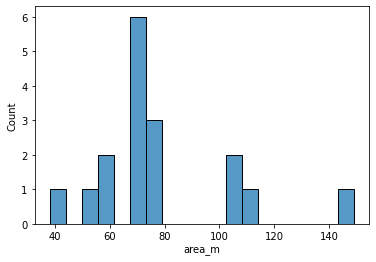

In [82]:
sns.histplot(df_co['area_m'])

<Axes: xlabel='cost_m', ylabel='Count'>

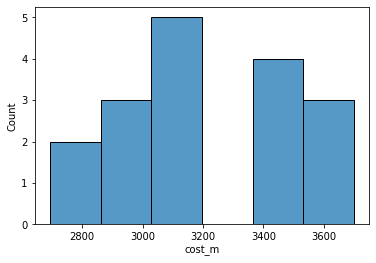

In [83]:
df_co['cost_m'] = df_co['price_usd']/df_co['area_m']
sns.histplot(df_co['cost_m'])

In [84]:
#   посчитаем z-score
df_co['z_cost_m'] = zscore(df_co['cost_m'])
df_co[abs(df_co['z_cost_m']) > 3]['cost_m']

Series([], Name: cost_m, dtype: float64)

In [85]:
cost_array = df_co['cost_m'].copy()
students_t_distribution_confidence_interval(cost_array, 1.9735)

[3206.0761045385457, 140.49973019770448]

С 95% вероятностью можем утверждать, что наше средняя цена квадратного метра лежит в диапазоне $ 3,206.07 ± 140.50

#### Количество комнат:

num_buildings
1    0.882353
2    0.117647
Name: proportion, dtype: float64

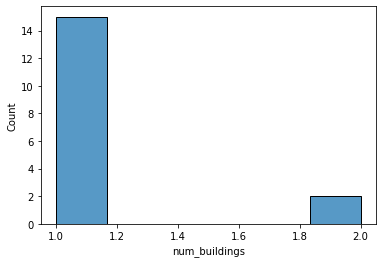

In [86]:
sns.histplot(df_co['num_buildings'])
df_co['num_buildings'].value_counts(normalize=True)

В 88.2% случаев компаниями приобретались 1-комнатные, в остальных 11.8% - 2-комнатные.

mortgage
No     0.764706
Yes    0.235294
Name: proportion, dtype: float64

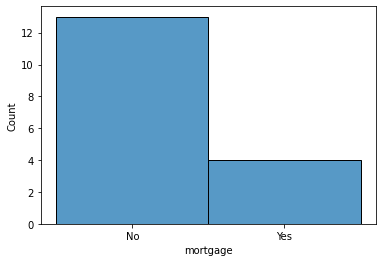

In [87]:
sns.histplot(df_co['mortgage'])
df_co['mortgage'].value_counts(normalize=True)

Только 23.5% случаев - ипотека.

month_sale
7     0.529412
3     0.117647
11    0.117647
12    0.117647
9     0.058824
10    0.058824
Name: proportion, dtype: float64

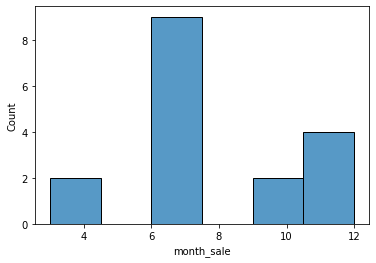

In [88]:
sns.histplot(df_co['month_sale'])
df_co['month_sale'].value_counts(normalize=True)

53% недвижимости куплено в июле.

Вывод по компаниям:
    
Компания в подавляющем большинстве случаев (~95%) покупает квартиру с целью инвестиций и стремится потратить
253,405.50 ± 47,971.06 USD при цене за кв.метр 3,206.07 ± 140.50 USD. Приобреталось 88% 1-комнатных и 12% - 2-комнатных. В 76.5% компании стараются обойтись без ипотеки. Также большинство приобретений происходило в июле.